In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# getting the data analyst jobs only from US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Dropping the NaN values from the salary_year_avg column 
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


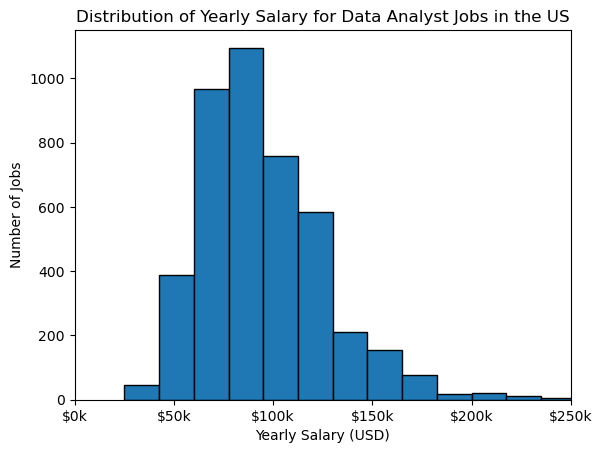

In [6]:
# plot histogram for yearly salary

from matplotlib.ticker import FuncFormatter
plt.hist(df_DA_US['salary_year_avg'], bins=20, edgecolor='black')
plt.title('Distribution of Yearly Salary for Data Analyst Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 250000)  # Limiting x-axis for better visualization
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.show()